In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

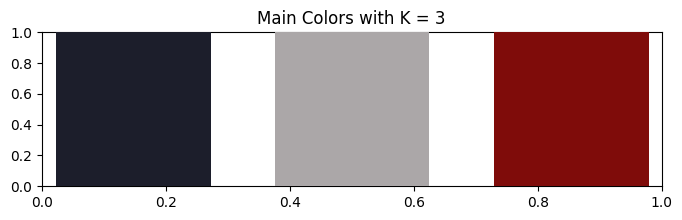

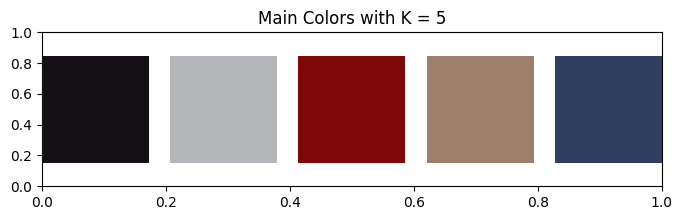

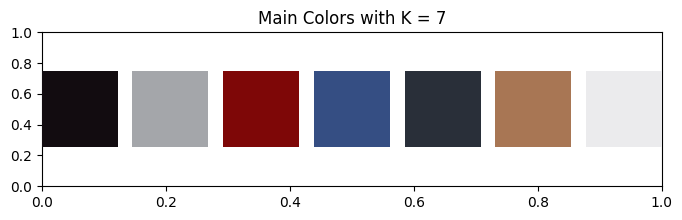

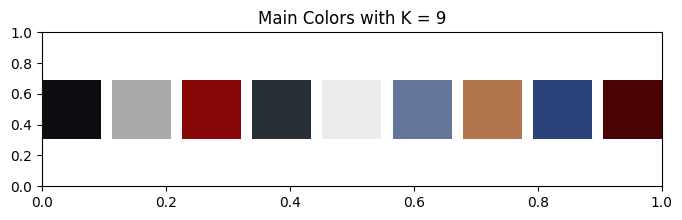

In [2]:
image = cv2.imread("trump_tie_1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

pixels = image.reshape(-1, 3)

K_values = [3, 5, 7, 9]

for K in K_values:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(pixels)
    colors = kmeans.cluster_centers_.astype(int)  

    plt.figure(figsize=(8, 2))
    plt.title(f'Main Colors with K = {K}')
    
    for idx, color in enumerate(colors):
        plt.subplot(1, K, idx + 1)
        plt.axis('off')
        square = np.zeros((100, 100, 3), dtype=int)
        square[:, :] = color
        plt.imshow(square)
    
    plt.show()

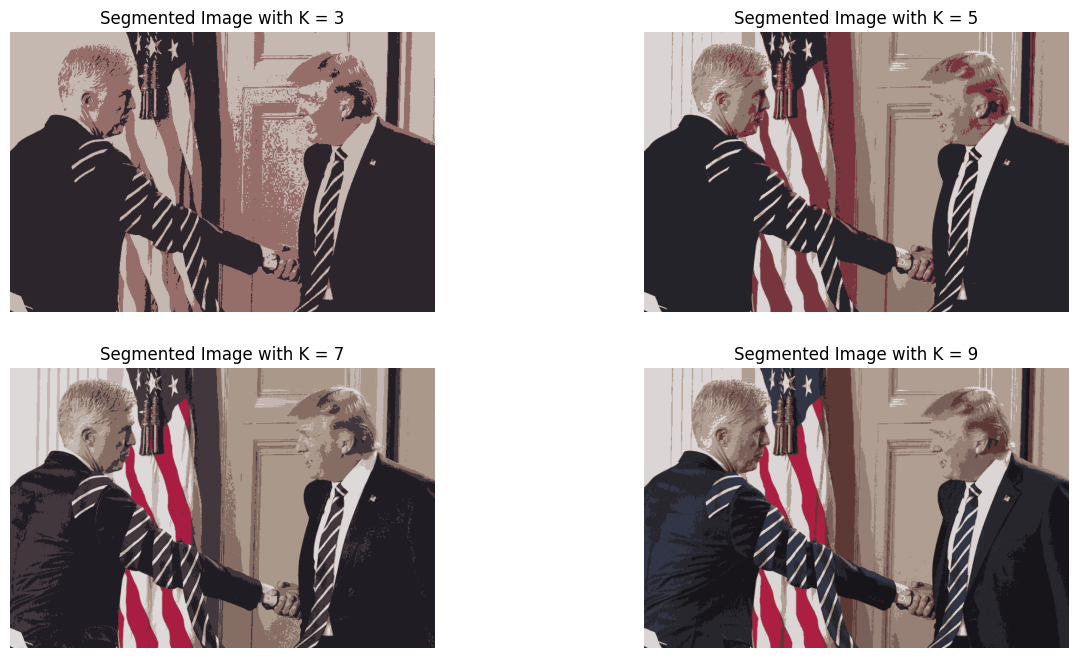

In [3]:
image = cv2.imread("trump_tie_2.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

pixels = image.reshape(-1, 3)

K_values = [3, 5, 7, 9]

plt.figure(figsize=(15, 8))

for i, K in enumerate(K_values, 1):
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(pixels)
    
    segmented_img = kmeans.cluster_centers_[kmeans.labels_].reshape(image.shape).astype(int)

    plt.subplot(2, 2, i)
    plt.title(f'Segmented Image with K = {K}')
    plt.axis('off')
    plt.imshow(segmented_img)

plt.show()

Original Size: 142.20 KB

Target Size: 71.10 KB (50% of original size)
Best Match for 50%: K = 10, Size = 30.33 KB

Target Size: 106.65 KB (75% of original size)
Best Match for 75%: K = 10, Size = 30.33 KB

Target Size: 127.98 KB (90% of original size)
Best Match for 90%: K = 10, Size = 30.33 KB

Target Size: 137.93 KB (97% of original size)
Best Match for 97%: K = 10, Size = 30.33 KB


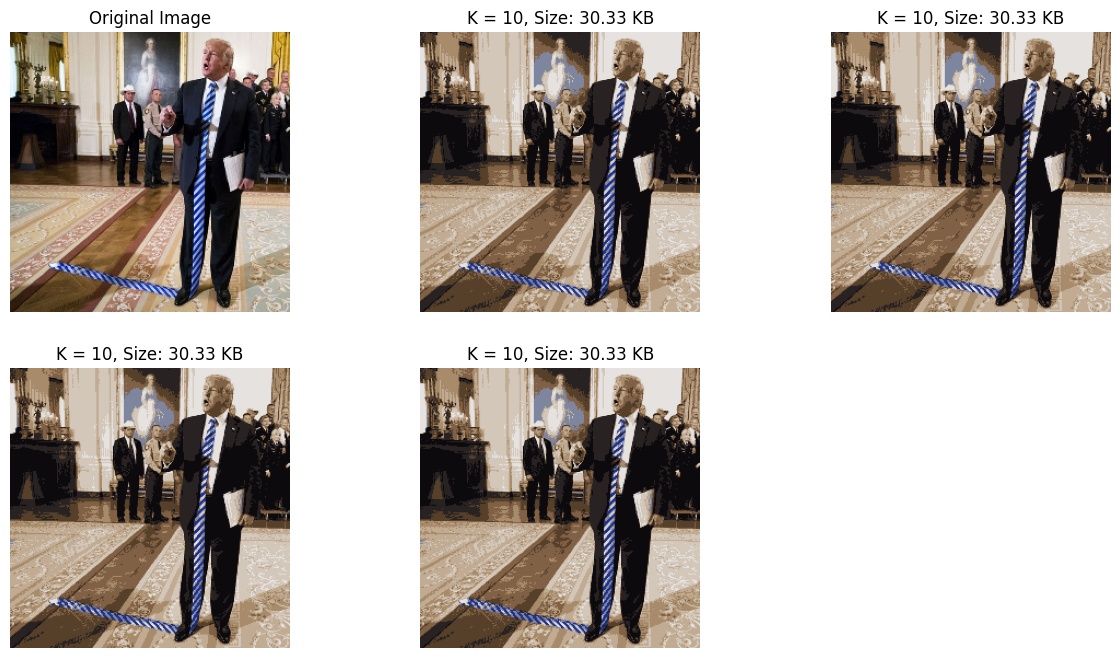

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
import os

image = cv2.imread("trump_tie_3.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (256, 256))  

original_size = os.path.getsize("trump_tie_3.jpg") / 1024  
print(f"Original Size: {original_size:.2f} KB")

pixels = image.reshape(-1, 3)

target_percentages = [50, 75, 90, 97]
compressed_images = []

K_values = range(5, 50, 5)  

for target_percentage in target_percentages:
    target_size = original_size * (target_percentage / 100)
    print(f"\nTarget Size: {target_size:.2f} KB ({target_percentage}% of original size)")

    best_compressed_img = None
    best_K = None
    best_size_diff = float("inf")

    for K in K_values:
        kmeans = MiniBatchKMeans(n_clusters=K, random_state=42, batch_size=1000)
        kmeans.fit(pixels)

        compressed_img = kmeans.cluster_centers_[kmeans.labels_].reshape(image.shape).astype(np.uint8)

        filename = f"compressed_{K}.jpg"
        cv2.imwrite(filename, cv2.cvtColor(compressed_img, cv2.COLOR_RGB2BGR), [cv2.IMWRITE_JPEG_QUALITY, 90])

        compressed_size = os.path.getsize(filename) / 1024  # in KB

        size_diff = abs(compressed_size - target_size)
        if size_diff < best_size_diff:
            best_size_diff = size_diff
            best_compressed_img = compressed_img
            best_K = K

        if size_diff < 1.0:
            break

    compressed_images.append((best_compressed_img, best_K, target_size - best_size_diff))
    print(f"Best Match for {target_percentage}%: K = {best_K}, Size = {target_size - best_size_diff:.2f} KB")

plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')

for i, (compressed_img, K, size) in enumerate(compressed_images, start=2):
    plt.subplot(2, 3, i)
    plt.title(f"K = {K}, Size: {size:.2f} KB")
    plt.imshow(compressed_img)
    plt.axis('off')

plt.show()
